# Especificação da Solução

Vamos desenvolver uma solução que utilize IA para processar informações da Câmara dos Deputados do Brasil, tanto textuais, quanto imagens. A solução possui uma parte offline e online, descritas abaixo:

- **Offline (dataprep.py)**: coleta das informações com as APIs públicas da câmara e execução de atividades com prompts para sumarização, análises e marcação com palavras-chave. Criação de bases vetoriais para referência posterior.
- **Online (dashboard.py)**: visualização das informações coletadas, suas respectivas análises e interfaces com o usuário através de LLMs. 
- **URL base**: 'https://dadosabertos.camara.leg.br/api/v2/'
- **Data referência**: início em 01/08/2024 e fim em 30/08/2024 (datas inclusivas).
- **Plug-and-play**: a solução deve esperar um arquivo .env com a chave Gemini do usuário (o aluno desenvolve com a sua, mas não a exporta para o git!).
- **Faça o upload de todos os arquivos finais** (parquet, json, yaml e png).

## Exercício 1 Arquitetura da Solução

Desenhe a arquitetura da solução com o programa da sua escolha. 

A arquitetura deve indicar os pontos de processamento de informação, LLMs utilizados, bases de dados (parquets, jsons e faiss), arquivos de configuração (yaml), abas do dashboard e suas funcionalidades.
   
   - a. Exporte a arquitetura para o arquivo pdf importado no sistema.
 
   - b. Descreva a arquitetura, explicando seus pontos importantes.
   - c. Descreva o funcionamento de LLMs e como isso pode ser utilizado para atividades de sumarização.

## Exercício 2 Criação de Textos com LLMs

Utilize a sua conta no “poe.com” para gerar um texto curto (2 parágrafos) que explique a Câmara dos Deputados. <br>
Execute o mesmo prompt com 3 LLMs diferentes (claude, gemini e chatgpt) e:
   - a. Explique as vantagens e desvantagens dos três LLMs escolhidos.
   - b. Argumente sobre a diferença entre a resposta dos 3 LLMs.
   - c. Justifique a escolha da resposta final.
   - d. Atualize o prompt do LLM final para gerar um arquivo data/config.yaml com a resposta final (chave: overview_summary).

- Explique as vantagens e desvantagens dos três LLMs escolhidos.
    - O Gemini 1.5 Pro suporta um número muito maior de tokens no prompt de entrada, cerca de 1M, enquanto os demais aceitam cerca de 200 mil. 
    - Para Output, o Gemini 1.5Pro também tem uma capacidade superior, gerando até 8 mil, enquanto o Claude 4 mil e o GPT-4o 2 mil.
    - Dependendo da infraestrutura utilizada pela empresa, pode ser mais vantajoso utilizar o Gemini que é integrado por natureza a toda estrutura do Google Cloud Plataform, ou o GPT, que é abarcado na Azure. 
    - O custo do GPT-4o chega a ser 4x superior ao custo do Gemini 1.5 Pro.
    - No Benchmark entre modelos pode se observar que as notas dos 3 LLMs são muito próximas, com o ranking se intercambiando entre nas diferentes vertentes de avaliação.

    fontes: 
    - https://context.ai/compare/
    - https://artificialanalysis.ai/models?models_selected=gpt-4o-2024-08-06%2Cgemini-1-5-pro%2Cclaude-35-sonnet

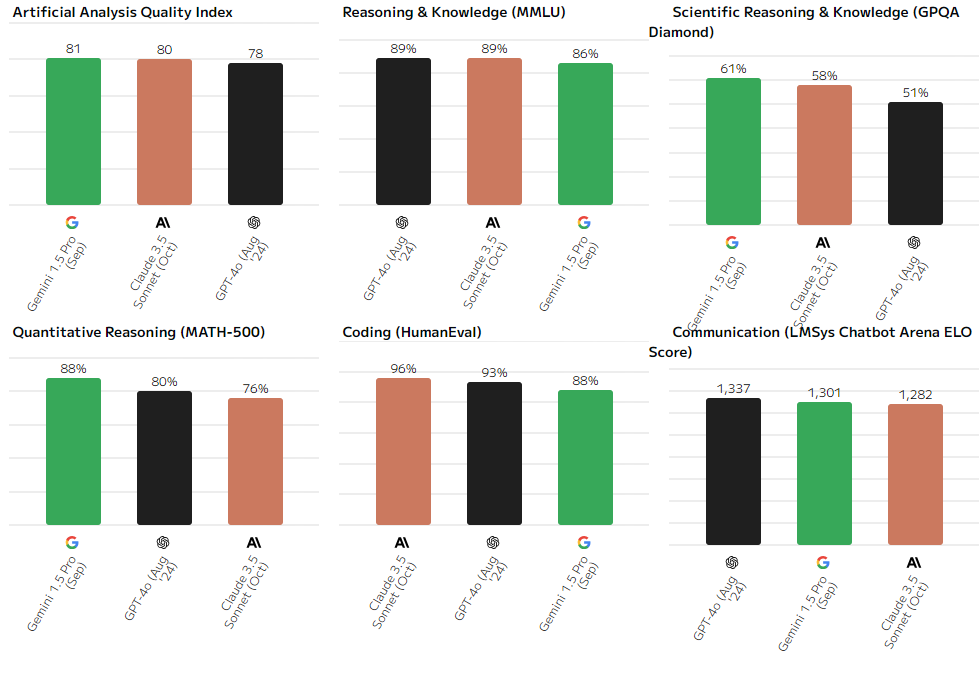

- Argumente sobre a diferença entre a resposta dos 3 LLMs.
    - Os 3 modelos utilizaram basicamente as mesmas informações para contextualizar a Câmara dos Deputados, citando que é composta por 513 deputados, que são eleitos por votos da população e que fiscalizam o poder executivo e criam leis.
        - Apenas o Claude e o Sonnet informaram que a quantidade de deputados para cada estado é proporcional ao tamanho da população.
        - O Claude e o GPT-4o detalharam melhor o funcionamento da Câmara no segundo parágrafo.
        - O Gemini formulou o segundo parágrafo com percepções, usando sentenças como "debates acalorados", "reflexo da diversidade do povo", "busca por soluções para os desafios do país" e "fundamental para a democracia.
        - O GPT-4o explicou sobre a função das comissões permanentes para discutir projetos de leis antes de irem para votação no plenário, e que servem para escutar opniões de especialistas e da sociedade civil.
        - O Claude explicou sobre o sistema de freios e contrapesos, que possibilita instaurar CPIs para sabatinar autoridades, e até mesmo abrir processos administrativos contra o presidente da república.
- Justifique a escolha da resposta final.
    - Selecionada a resposta do Claude, pois abrangiu mais detalhes em um texto de tamanho similar aos demais modelos.
- Atualize o prompt do LLM final para gerar um arquivo data/config.yaml com a resposta final (chave: overview_summary).

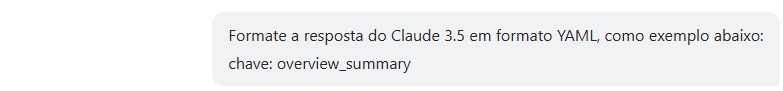
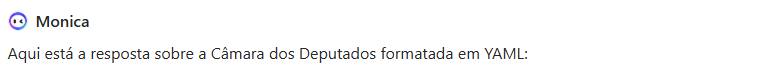
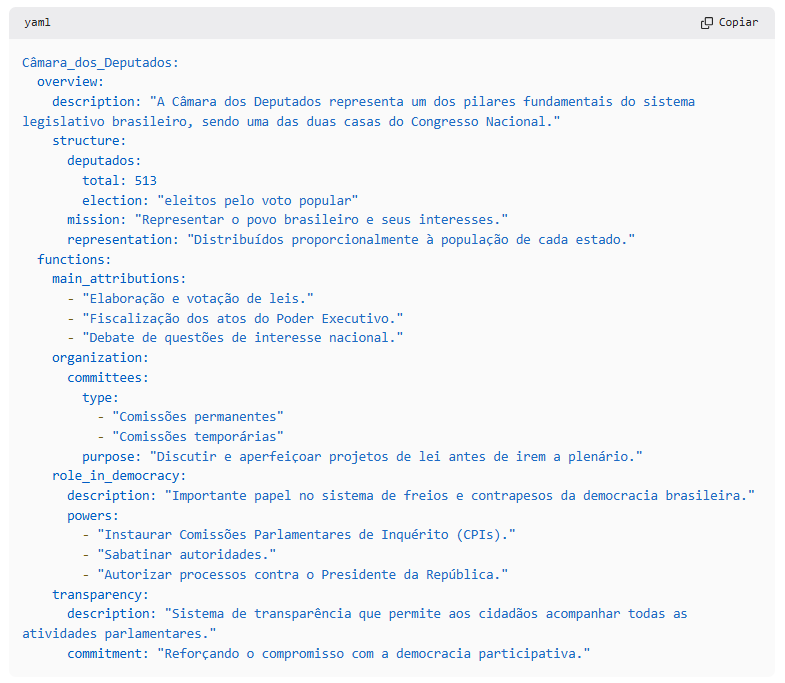

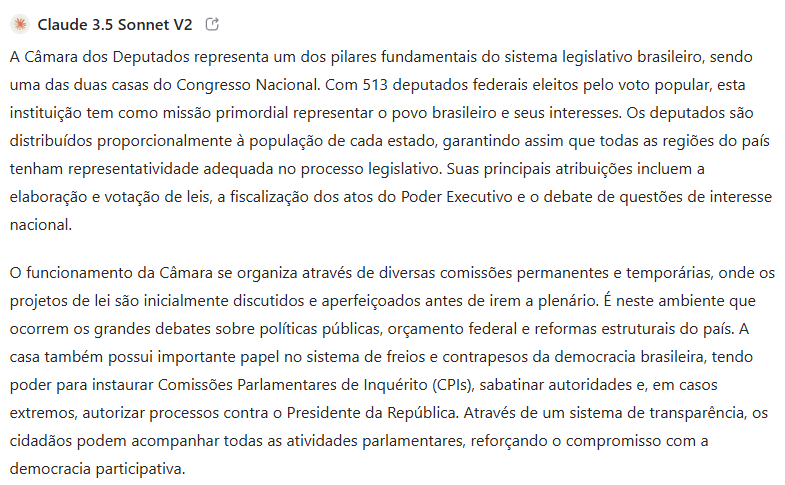

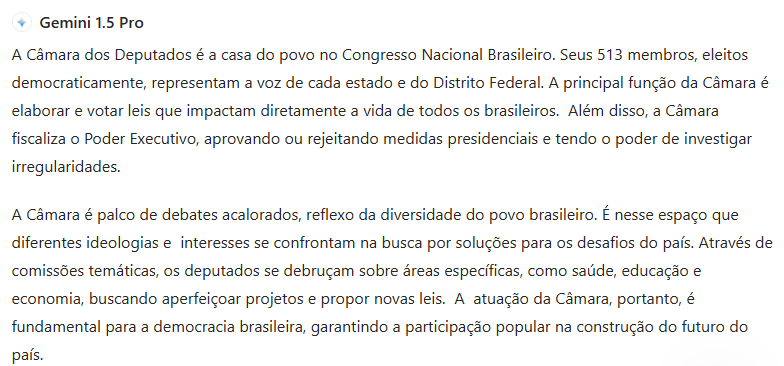

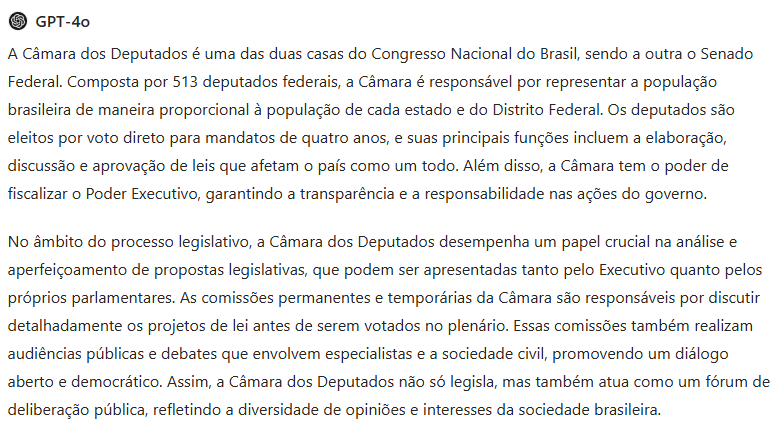

## Exercício 3 Processamento dos dados de deputados

Implemente em dataprep.py uma função que faça a coleta das informações dos deputados atuais da câmara dos deputados:
   - a. Colete e salve os dados dos deputados atuais da câmara no arquivo data/deputados.parquet através da url: url_base+/deputados.
   - b. Executar prompt para criar o código que gere um gráfico de pizza com o total e o percentual de deputados de cada partido, salvo em 'docs/distribuicao_deputados.png'.
   - c. Executar prompt utilizando os resultados da análise anterior (distribuição de deputados por partido) para gerar insights sobre a distribuição de partidos e como isso influencia a câmara. 
      - Utilize os elementos de prompts dados, persona e exemplos para instruir o LLM. 
      - Explique o objetivo de cada elemento, avalie a resposta e salve-a em data/insights_distribuicao_deputados.json.

<div style="background-color: #f8ffe0; padding: 20px; border-radius: 5px;">

### Resposta
- Explique o objetivo de cada elemento
    - **Dados**: Informações a serem analisadas. Dados fornecidos em formato json com quebra de linha, para melhor compreensão do modelo.
    - **Persona**: "You are a political data analyst". A persona ajusta o estilo e o tom da resposta.
    - **Exemplos**: Foram fornecidos 3 exemplos de insights auxiliar o modelo a gerar respostas consistentes e alinhadas à expectativa.
- Avalie a resposta
    - O modelo gerou uma resposta muito mais completa que os exemplos passados, a intepretação dos valores está correta e conseguiu complementar muito bem com analises sobre como a concentração de poder em certas coligações pode influenciar na aprovação legislativa.

In [ ]:
import requests
import pandas as pd

url_base = "https://dadosabertos.camara.leg.br/api/v2"
url = f"{url_base}/deputados"
response = requests.get(url)
dados = response.json()['dados']

df = pd.DataFrame(dados)
df.to_parquet(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\deputados.parquet')

In [33]:
import os
import google.generativeai as genai
from dotenv import load_dotenv

path_deputados = r"C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\deputados.parquet"
path_png = r"C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\docs\distribuicao_deputados.png"
path_distribuicao = r"C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\distribuicao_deputados.parquet"

prompt_1 = f"""
You are a python developer, and need to create a script in python to implement the instructions bellow.
You have a parket file in the path {path_deputados}, with the following columns: 

- id: unique identifier of the deputy
- uri: deputy id endpoint
- nome: name of the deputy
- siglaPartido: Party acronym
- uriPartido: Party endpoint
- siglaUf: state acronym
- idLegislatura: legislative period identifier
- urlFoto: deputy photo endpoint
- email: deputy email

Instruction: 
1.Import the file "deputados.parquet" as a DataFrame named df.
2.Calculate the percentage of deputies from each party. 
3.Reset Index and Save the result as a parquet file in the path {path_distribuicao}.
4.Create a pie chart showing the total and distribution of deputies from each party.
5.Save the graphic as a .png file, in the path {path_png}.
6.Add a docstring with description of columns and variables.
7.Output only the code, no need for explanations.
"""

load_dotenv()
genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
resp_1 = model.generate_content(prompt_1)
resp_1 = resp_1.text.replace("```python\n",'').replace("\n```",'')
print(resp_1)

"""
This script analyzes the distribution of deputies by party from a parquet file.

Columns:
    - id: unique identifier of the deputy
    - uri: deputy id endpoint
    - nome: name of the deputy
    - siglaPartido: Party acronym
    - uriPartido: Party endpoint
    - siglaUf: state acronym
    - idLegislatura: legislative period identifier
    - urlFoto: deputy photo endpoint
    - email: deputy email

Variables:
    - df: DataFrame containing deputy data.
    - party_distribution: DataFrame showing the percentage of deputies from each party.
"""
import pandas as pd
import matplotlib.pyplot as plt

# Load the parquet file into a pandas DataFrame
df = pd.read_parquet(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\deputados.parquet')

# Calculate the percentage of deputies from each party
party_distribution = df['siglaPartido'].value_counts(normalize=True) * 100
party_distribution = party_distribution.reset_index()
party_distribution.columns = ['siglaPartido', 'percentage

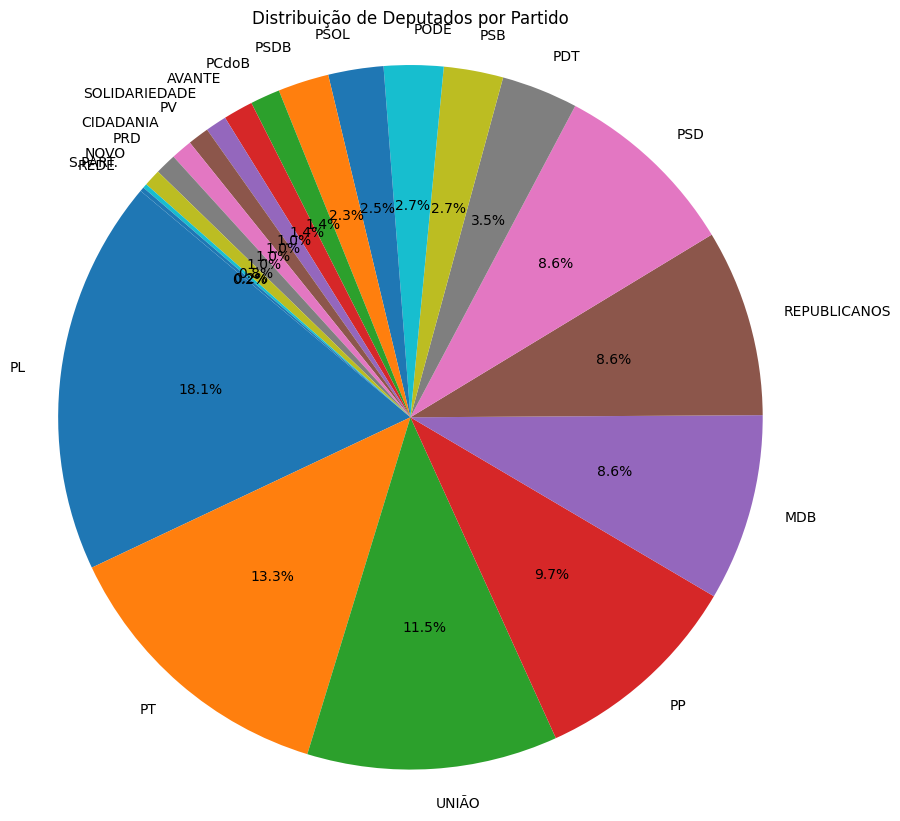

In [34]:
exec(resp_1)

In [54]:
import json

df = pd.read_parquet(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\distribuicao_deputados.parquet')
json_resultado = df.to_json(orient='records', lines=True)

prompt_2 = f"""
### 
{json_resultado}
### 

You are a political data analyst.
Based on the table above, generate insights about the distribution of deputies by party and how this may influence the Chamber of Deputies.

Example of insights:
- The party with the most representatives is the XXX, with YYY deputies.
- The party with the least representatives is the XXX, with YYY deputies.
- 80% of the deputies are from the parties XXX, YYY, ZZZ.
"""

resp_2 = model.generate_content(prompt_2)

data = {"text": resp_2.text}

with open(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\insights_distribuicao_deputados.json', 'w') as file:
    json.dump(data, file, ensure_ascii=False, indent=4)
    
print(resp_2.text)

Based on the provided data representing the percentage distribution of deputies by party, we can derive the following insights about the Brazilian Chamber of Deputies:

**Dominant Parties and Their Influence:**

* **PL's Strong Position:** The PL (Partido Liberal) holds a significant lead with 18.13% of the deputies, establishing itself as the dominant force in the Chamber.  This strong representation will give the PL considerable influence in shaping legislative agendas, forming alliances, and potentially electing key leadership positions.

* **The "Big Three" and Their Coalition Potential:**  The PL, PT (Partido dos Trabalhadores - Workers' Party), and UNIÃO (União Brasil) together represent over 42% of the deputies. These three parties will likely hold the key to forming governing coalitions and passing legislation.  Their relationships and potential alliances will be crucial in determining the overall political direction of the Chamber.

* **Significant Minority Blocks:**  While th

## Exercício 4 Processamento dos dados de despesas

Implemente em dataprep.py uma função que colete as informações das despesas dos deputados atuais da câmara dos deputados no período de referência da solução (use a url: url_base+/deputados/{id}/despesas).
   - a. Agrupe os dados de despesas por dia, deputado e tipo de despesa e salve num arquivo parquet (data/serie_despesas_diárias_deputados.parquet).
   - b. Utilizando a técnica de prompt-chaining, crie um prompt que instrua o LLM a gerar um código python que analise os dados das despesas dos deputados. Peça para o LLM até 3 análises. Indique ao LLM quais dados estão disponíveis e o respectivo arquivo (salvo em a)) e execute as análises.
   - c. Utilize os resultados das 3 análises para criar um prompt usando a técnica de Generated Knowledge para instruir o LLM a gerar insights. Salve o resultado como um JSON (data/insights_despesas_deputados.json).

### Argrupando os dados

In [119]:
import requests
import pandas as pd

url_base = "https://dadosabertos.camara.leg.br/api/v2"
df_despesas = pd.DataFrame()

df_deps = pd.read_parquet(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\deputados.parquet')
path_despesas = r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\serie_despesas_diárias_deputados.parquet'

for id in df_deps['id']:
    url = f"{url_base}/deputados/{id}/despesas"
    response = requests.get(url)
    dados = response.json()['dados']
    df_iter = pd.DataFrame(dados)
    df_iter['id_deputado'] = id
    df_despesas = pd.concat([df_despesas, pd.DataFrame(df_iter)])

df_despesas = df_despesas.groupby(['id_deputado','mes', 'tipoDespesa'])['valorLiquido'].sum().reset_index()
df_despesas.columns = ['deputy_id', 'month', 'expense_type', 'net_value']

df_despesas.to_parquet(path_despesas)

### Prompt 1 - Gear lista de Análises

In [120]:
prompt_1 = f"""
You are a data scientist analyzing the spending history of deputies in 2024.
You have a file with the following columns: 

- deputy_id: Unique identifier of the deputy.
- month: Unique identifier of the deputy.
- expense_type: Classification of the type of expense.
- net_value: Amount of the expense.

Generate a list of 3 analyses that can be implemented given the available series_data, as a JSON file:
{[
    {'Name':'analysis name',
     'Objective': 'what we need to analyze',
     'Method': 'how we analyze it'
    }
]
}

Not allowed to use graphs in the analysis.
"""
load_dotenv()
genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_1)
analysis = json.loads(response.text.replace("```json\n",'').replace("\n```",''))
analysis

[{'Name': 'Average Monthly Spending per Deputy',
  'Objective': 'Determine the average monthly spending for each deputy in 2024, providing insights into individual spending habits.',
  'Method': "1. Group the data by 'deputy_id' and 'month'.\n2. Calculate the sum of 'net_value' for each group (representing total monthly spending).\n3. Calculate the average of these monthly sums for each 'deputy_id'. This will provide the average monthly spending for each deputy."},
 {'Name': 'Expense Type Distribution',
  'Objective': 'Analyze the distribution of spending across different expense types throughout the year, to identify areas of significant expenditure.',
  'Method': "1. Group the data by 'expense_type'.\n2. Calculate the sum of 'net_value' for each 'expense_type'.\n3. Calculate the percentage of total spending represented by each 'expense_type'. This provides the proportional distribution of spending across different expense categories."},
 {'Name': 'Monthly Spending Trend Analysis',
  

### Prompt 2 - Gerar Script Python para Executar as Analises

In [126]:
prompt_2 = f"""
You are a data scientist analyzing the spending history of deputies in 2024.
You have a parket file in the path {path_despesas}, with the following columns: 

- deputy_id: Unique identifier of the deputy.
- month: Unique identifier of the deputy.
- expense_type: Classification of the type of expense.
- net_value: Amount of the expense.

Instructions:
1.Implement the 3 analyses described below in Python.
2.Use variables (Analysis1, Analysis2, Analysis3) to store the processed dataframe from each analysis in json format (Parameters: lines=True, force_ascii=False).
3.Use variables (Name1, Name2, Name3) to store the name of each analysis.
4.Output only the code, no need for explanations.

## ANALYSIS
{analysis}
"""

response = model.generate_content(prompt_2)
script = response.text.replace("```python\n",'').replace("\n```",'')
print(script)

import pandas as pd
import json

# Load the parquet file
df = pd.read_parquet(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\serie_despesas_diárias_deputados.parquet')

# Analysis 1: Average Monthly Spending per Deputy
analysis1_df = df.groupby(['deputy_id', 'month'])['net_value'].sum().groupby('deputy_id').mean().reset_index()
Analysis1 = analysis1_df.to_json(orient='records', lines=True, force_ascii=False)
Name1 = 'Average Monthly Spending per Deputy'

# Analysis 2: Expense Type Distribution
analysis2_df = df.groupby('expense_type')['net_value'].sum().reset_index()
analysis2_df['percentage'] = (analysis2_df['net_value'] / analysis2_df['net_value'].sum()) * 100
Analysis2 = analysis2_df.to_json(orient='records', lines=True, force_ascii=False)
Name2 = 'Expense Type Distribution'

# Analysis 3: Monthly Spending Trend Analysis
analysis3_df = df.groupby('month')['net_value'].sum().reset_index()
Analysis3 = analysis3_df.to_json(orient='records', lines=True, force_ascii=False)


### Executando o Script

In [128]:
exec(script)

### Prompt 3 e 4 - Generated Knowledge
- **Prompt 3** Cria perguntas a serem respondidas baseadas nas análises definidas anteriormente
- **Prompt 4** Passa os dados para que sejam respondidas as perguntas

In [ ]:
list_names = [Name1, Name2, Name3]
list_datasets = [Analysis1, Analysis2, Analysis3]

results = []

for i, name in enumerate(list_names):
    prompt_3 = f"""
    You are a data scientist searching for insights in the spending history of deputies in 2024.
    Given the analyses described below, define 3 main questions that you would ask to extract insights from the data.
    Output only the numbered list of questions.

    Analysis: {name}
    """

    response = model.generate_content(prompt_3)
    questions = response.text

    prompt_4 = f"""
    Answer the questions listed bellow using the data in [DATASET]. 
    The output must be a JSON file with the following structure:
    {[
        {'Question': 'Description of the analysis',
         'Answer': 'Answer of the question'
        }
    ]}

    Questions:
    {questions}

    DATASET:
    ###
    {list_datasets[i]}
    ###
    """

    response = model.generate_content(prompt_4)
    insight = json.loads(response.text.replace("```json\n",'').replace("\n```",''))
    results.append(insight)

with open(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\insights_despesas_deputados.json', 'w') as json_file:
    json.dump(results, json_file, ensure_ascii=False, indent=4)

In [134]:
results

[[{'Question': 'What are the key drivers of variation in average monthly spending among deputies?',
   'Answer': "The provided dataset only contains the net value of spending for each deputy, without any additional information on potential drivers of variation such as department, geographical location, responsibilities, or time period.  Therefore, it's impossible to determine key drivers of spending variation from this data alone.  Further data is needed to answer this question meaningfully."},
  {'Question': 'How does average monthly spending per deputy compare across different departments or geographical locations?',
   'Answer': 'The dataset lacks information on the department or geographical location of each deputy. Consequently, a comparison of average monthly spending across different departments or geographical locations is not possible. Additional data is required.'},
  {'Question': 'Are there any significant trends or patterns in average monthly spending over time (e.g., seaso

## Exercício 5 Processamento dos dados de proposições

Implemente em dataprep.py uma função que faça a coleta das informações das proposições que tramitam no período de referência (dataInicio e dataFim) e são do tema 'Economia', 'Educação' e 'Ciência, Tecnologia e Inovação' (códigos [40, 46, 62]).
   - a. Coletar um total de 10 proposições por tema e salvar em data/proposicoes_deputados.parquet.
   - b. Utilize a sumarização por chunks para resumir as proposições tramitadas no período de referência. Avalie a resposta e salve-a em data/sumarizacao_proposicoes.json.

## Exercício 6 Dashboards com Chain-of-thoughts

Utilize 3 etapas de Chain-of-Thought prompting para escrever o código inicial do dashboard, destacando as abas Overview, Despesas e Proposições. 
Explique o objetivo de cada prompt na evolução do código até o arquivo dashboard.py final:
   - a. A aba Overview deve possuir um título e descrição da solução de sua escolha.
   - b. O painel deve mostrar o texto sumarizado em config.yaml.
   - c. O painel deve mostrar o gráfico de barras em docs/distribuicao_deputados.png.
   - d. O painel deve mostrar os insights do LLM sobre a distribuição de deputados em data/insights_distribuicao_deputados.json.

## Exercício 7 Dashboards com Batch-prompting

Utilize a técnica de Batch-prompting para escrever o código streamlit que preencha as abas Despesas e Proposições do código em dashboard.py. 
O prompt deve descrever com detalhes cada aba para geração de:
   - a. Aba Despesas deve mostrar os insights sobre as despesas dos deputados (data/insights_despesas_deputados.json).
   - b. Aba Despesas deve conter um st.selectbox para seleção do deputado.
   - c. Aba Despesas deve mostrar gráfico de barras com a série temporal de despesas do deputado selecionado (data/serie_despesas_diárias_deputados.parquet).
   - d. O painel deve mostrar uma tabela com os dados das proposições (data/proposicoes_deputados.parquet).
   - e. O painel deve mostrar o resumo das proposições em (data/sumarizacao_proposicoes.json).
   - f. Compare o resultado dos códigos gerados pelas técnicas de Chain-of-Thoughts e Batch-prompting.

## Exercício 8 Assistente online com base vetorial

Adicione ao código da aba Proposições uma interface para chat com um assistente virtual especialista em câmara dos deputados. 
As informações coletadas dos deputados, despesas e proposições (e suas sumarizações) devem ser vetorizadas usando o modelo "neuralmind/bert-base-portuguese-cased" para armazenamento na base vetorial FAISS. 
O prompt do sistema para o assistente virtual deve ser feito com a técnica Self-Ask:
   - a. Explique como a técnica de self-ask pode ser utilizada nesse contexto.
   - b. Avalie o resultado do modelo para as seguintes perguntas:
      - I. Qual é o partido político com mais deputados na câmara?
      - II. Qual é o deputado com mais despesas na câmara?
      - III. Qual é o tipo de despesa mais declarada pelos deputados da câmara?
      - IV. Quais são as informações mais relevantes sobre as proposições que falam de Economia?
      - V. Quais são as informações mais relevantes sobre as proposições que falam de 'Ciência, Tecnologia e Inovação'?

## Exercício 9 Geração de Imagens com Prompts

Utilizando as informações sumarizadas das proposições dos deputados, vamos gerar prompts que possam fazer alusão aos temas e o que está sendo proposto. 
Use o google Colab para gerar imagens com o modelo "CompVis/stable-diffusion-v1-4" para duas proposições de sua escolha. 
Com essas informações, responda:
   - a. Descreva o funcionamento dos modelo de imagem, segundo suas arquiteturas, limitações e vantagens:
      - I. Stable Diffusion
      - II. DALL-e
      - III. MidJourney
   - b. Utilize diferentes técnicas de “Estilo Visual” e “Composição”, além de exemplos com negative prompting, para gerar 3 versões de imagem para cada proposição e avalie...
